# 1. Code : Importing all the necessary Libraries.

In [ ]:
# Import the necessary packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

# 2. Code : Loading the Data.

In [ ]:
# Load the dataset from the csv file using pandas.
# Best way is to mount the drive on colab and.
# Copy the path for the csv file.
data = pd.read_csv("/content/creditcard.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# 3. Code : Understanding the Data.

- Principal Component Analysis (PCA) is the most popular dimensionality reduction algorithm to date. It first determines the hyperplane located closest to the data, then projects the data points onto that hyperplane.

In [ ]:
# Grab a peek at the data.
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


# 4. Code : Describing the Data.

In [ ]:
# Print the shape of the data.
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

# 5. Code : Imbalance in the data.

## 5.1. Visualize data.

In [ ]:
# Create the Group column based on the Class column so as not to affect model training.
data['Group'] = data['Class']
data['Group']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
239668    0.0
239669    0.0
239670    0.0
239671    0.0
239672    NaN
Name: Group, Length: 239673, dtype: float64

In [ ]:
for i in range(len(data)):
    if data['Group'].iloc[i] == 1:
        data['Group'].iloc[i] = 'fraud'
    else:
        data['Group'].iloc[i] = 'normal'

In [ ]:
freq = data.groupby(['Group'])['Group'].count()
freq

Group
fraud        437
normal    239236
Name: Group, dtype: int64

<Axes: xlabel='Group', ylabel='count'>

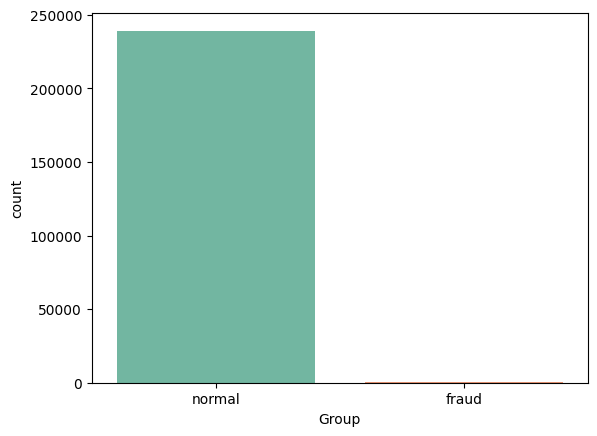

In [ ]:
# Use a different colour palette in count plot.
sns.countplot(data = data, x ='Group', hue="Group", stat="count", palette = "Set2")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage_countplot(data, x, hue):
    total = float(len(data))

    ax = sns.countplot(x=x, hue=hue, data=data, palette = "Set2", stat="count")

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
          ax.text(p.get_x() + p.get_width() / 2.,
                    height / 2 + p.get_y(),
                    '{:.2f}%'.format((height / total) * 100),
                    ha="center",
                    color="white")

    plt.show()

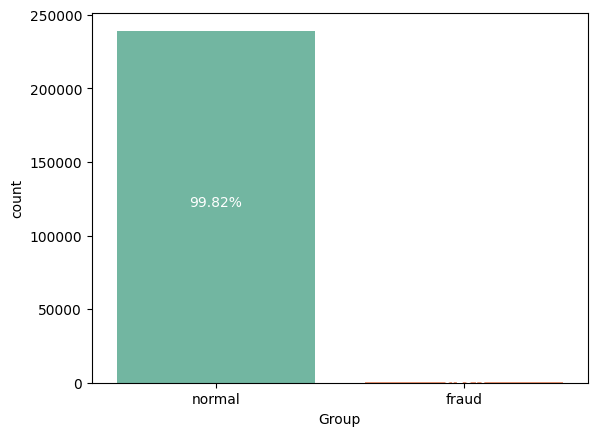

In [ ]:
plot_percentage_countplot(data=data, x='Group', hue='Group')

## 5.2. Imbalanced data.

- The data is Imbalanced data (too skewed).

In [ ]:
# Determine number of fraud cases in dataset.
# 1 is Customer Fraud.
# 0 is a Normal Customer.
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
total = data[data['Class'] == 1] + data[data['Class'] == 0]

outlierFraction = len(fraud)/float(len(valid) + len(fraud))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))
print('Total Transactions: {}'.format(len(total)))

0.0018233252111218665
Fraud Cases: 437
Valid Transactions: 239235
Total Transactions: 239672


- Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced.

### Xử lý chúng bằng Downsampling.

<ipython-input-74-1fb05b403d10>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=balanced_data, x='Class', palette = "coolwarm")


Text(0.5, 0, 'Classify types')

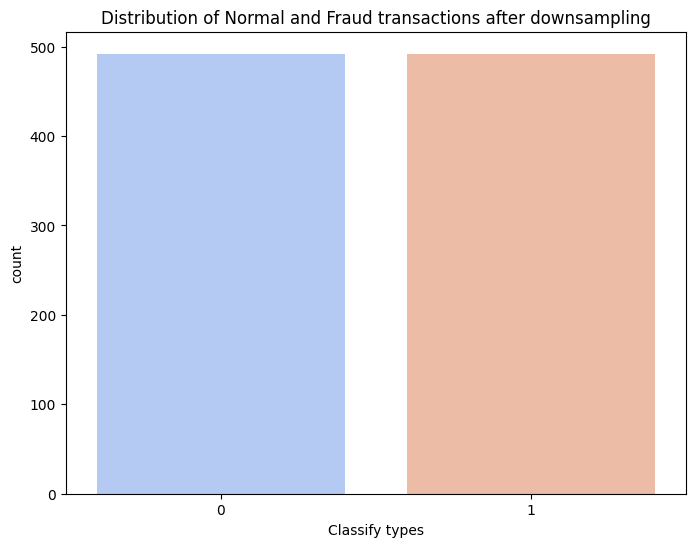

In [ ]:
# Downsampling to balance the dataset.
normal_data = data[data.Class == 0]
fraud_data = data[data.Class == 1]
normal_data = normal_data.sample(n=len(fraud_data),random_state=42)

# Concatenating the downsampled DataFrames.
balanced_data = pd.concat([normal_data, fraud_data]).reset_index(drop=True)

# Plotting the counts of down sampled dataset.
plt.figure(figsize=(8, 6))
sns.countplot(data=balanced_data, x='Class', palette = "coolwarm")
plt.title('Distribution of Normal and Fraud transactions after downsampling')
plt.xlabel('Classify types')

# 6. Code : Print the amount details for Fraudulent Transaction.

In [ ]:
# Filter fraud cases where Amount is 0.00 and drop rows with NaN values
filtered_data = data[(data['Class'] == 1) & (data['Amount'] == 0.00)]

# Select only index and Amount column
result = filtered_data[['Amount']].dropna()

# Print the result
# print(result)
print(result.count())

Amount    25
dtype: int64


In [ ]:
print(fraud.where(data['Amount'] == 0.00).dropna())

            Time         V1         V2         V3         V4         V5  \
541        406.0  -2.312227   1.951992  -1.609851   3.997906  -0.522188   
8842     12093.0  -4.696795   2.693867  -4.475133   5.467685  -1.556758   
23308    32686.0   0.287953   1.728735  -1.652173   3.813544  -1.090927   
42756    41233.0 -10.645800   5.918307 -11.671043   8.807369  -7.975501   
69980    53658.0  -1.739341   1.344521  -0.534379   3.195291  -0.416196   
93486    64443.0   1.079524   0.872988  -0.303850   2.755369   0.301688   
93788    64585.0   1.080433   0.962831  -0.278065   2.743318   0.412364   
141257   84204.0  -0.937843   3.462889  -6.445104   4.932199  -2.233983   
141258   84204.0  -0.937843   3.462889  -6.445104   4.932199  -2.233983   
143333   85285.0  -7.030308   3.421991  -9.525072   5.270891  -4.024630   
143334   85285.0  -7.030308   3.421991  -9.525072   5.270891  -4.024630   
154587  102114.0 -28.255053  21.467203 -26.871339  11.737436 -17.999630   
154668  102480.0  -1.9295

In [ ]:
print(fraud.where(data['Amount'] == 0.00).count())

Time      25
V1        25
V2        25
V3        25
V4        25
V5        25
V6        25
V7        25
V8        25
V9        25
V10       25
V11       25
V12       25
V13       25
V14       25
V15       25
V16       25
V17       25
V18       25
V19       25
V20       25
V21       25
V22       25
V23       25
V24       25
V25       25
V26       25
V27       25
V28       25
Amount    25
Class     25
Group     25
dtype: int64


In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()
# Số tiền gian lận lớn nhất là 2125.87.
# Số tiền gian lận nhỏ nhất là 0.

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

- As we can clearly notice from this, the average Money transaction for the fraudulent ones is more. This makes this problem crucial to deal with.

# 7. Code : Plotting the Correlation Matrix.

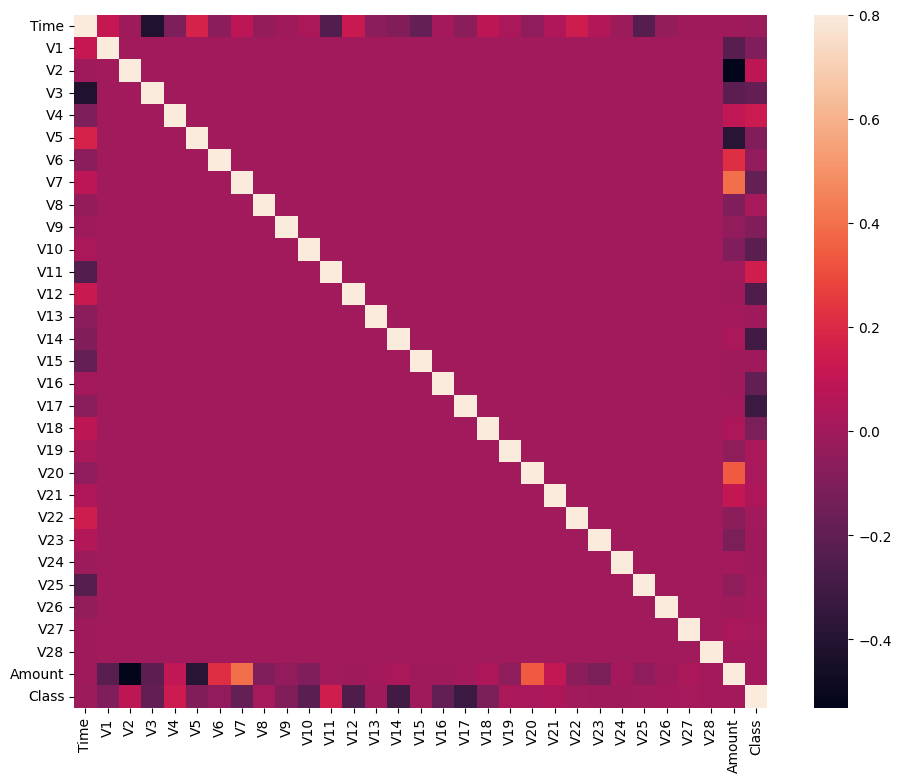

In [ ]:
# Correlation matrix.
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

- In HeatMap we can clearly see that most features are not correlated with other features but there are some features that are positively or negatively correlated with each other. For example, V2 and V5 have a very high negative correlation with the feature called Amount. We also see some correlation with V20 and Amount. This helps us gain a deeper understanding of the Data available to us.

# 8. Code : Separating the X and the Y values.

## 8.1. Before Downsampling.

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
Group     0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
# Dividing the data into inputs parameters and outputs value format.
# Dividing the X and the Y from the dataset.
X = data.drop(['Class','Group'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# Getting just the values for the sake of processing.
# (Its a numpy array with no columns).
xData = X.values
yData = Y.values

(239672, 30)
(239672,)


## 8.2. After Downsampling.

In [ ]:
balanced_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Group
0,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0,normal
1,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0,normal
2,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0,normal
3,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0,normal
4,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1,fraud
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1,fraud
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1,fraud
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1,fraud


In [ ]:
# Dividing the data into inputs parameters and outputs value format.
# Dividing the X and the Y from the dataset.
X = balanced_data.drop(['Class','Group'], axis = 1)
Y = balanced_data["Class"]
print(X.shape)
print(Y.shape)
# Getting just the values for the sake of processing.
# (Its a numpy array with no columns).
xData = X.values
yData = Y.values

(984, 30)
(984,)


In [ ]:
xData

array([[ 8.24500000e+04,  1.31453919e+00,  5.90642763e-01, ...,
        -3.43210090e-02,  3.16924133e-02,  7.60000000e-01],
       [ 5.05540000e+04, -7.98671774e-01,  1.18509291e+00, ...,
        -3.96030194e-01, -1.12900666e-01,  4.18000000e+00],
       [ 5.51250000e+04, -3.91128407e-01, -2.45539891e-01, ...,
         1.63716130e-01,  2.39582023e-01,  1.50000000e+01],
       ...,
       [ 1.69351000e+05, -6.76142671e-01,  1.12636606e+00, ...,
         3.85107449e-01,  1.94361479e-01,  7.78900000e+01],
       [ 1.69966000e+05, -3.11383161e+00,  5.85864172e-01, ...,
         8.84875540e-01, -2.53700319e-01,  2.45000000e+02],
       [ 1.70348000e+05,  1.99197610e+00,  1.58475887e-01, ...,
         2.98758224e-03, -1.53088128e-02,  4.25300000e+01]])

# 9. Training and testing sets.

## 9.1. Before Downsampling.

In [ ]:
# Using Scikit-learn to split data into training and testing sets by using train_test_split function.
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets.
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

In [ ]:
xTrain

array([[ 1.46127000e+05, -1.55341594e+00, -2.92168323e+00, ...,
        -2.83483763e-01,  5.84795071e-02,  9.58920000e+02],
       [ 1.16303000e+05, -7.30066796e-01, -1.17409641e+00, ...,
         1.21398316e-01,  2.35096577e-01,  2.12000000e+02],
       [ 9.54150000e+04, -7.58870229e-01,  1.71273488e+00, ...,
         1.37405105e-01, -3.99092058e-01,  8.30000000e-01],
       ...,
       [ 7.97950000e+04, -1.46608925e-01,  9.92946123e-01, ...,
        -1.21139194e-01, -1.96195328e-01,  3.94000000e+00],
       [ 8.79310000e+04, -2.94863809e+00,  2.35484929e+00, ...,
         4.96912107e-01,  3.35821632e-01,  1.00000000e+00],
       [ 7.63810000e+04,  1.23317435e+00, -7.84850501e-01, ...,
         1.21657270e-03,  3.85878912e-02,  1.13000000e+02]])

In [ ]:
yTrain

array([0., 0., 0., ..., 0., 0., 0.])

## 9.2. After Downsampling.

In [ ]:
# Using Scikit-learn to split data into training and testing sets by using train_test_split function.
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets.
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

In [ ]:
xTrain

array([[146128.0, -0.587513835769608, 0.431051913099278, ...,
        0.13033410317071, 35.0, 'normal'],
       [116303.0, 1.77491666449302, -0.160205016568206, ...,
        -0.0527538070329975, 130.0, 'normal'],
       [146997.0, 2.01370555840337, -0.183753329409972, ...,
        -0.0691312393739813, 19.95, 'normal'],
       ...,
       [79795.0, -0.146608924901263, 0.992946122844556, ...,
        -0.196195328072126, 3.94, 'normal'],
       [87931.0, -2.94863809342513, 2.35484928853394, ...,
        0.33582163221274, 1.0, 'normal'],
       [76381.0, 1.23317435028622, -0.784850500688698, ...,
        0.0385878911833923, 113.0, 'normal']], dtype=object)

In [ ]:
yTrain

array([0., 0., 0., ..., 0., 0., 0.])

# 10. Build model using Random Forest.

## 10.1. Before Downsampling.

In [ ]:
# Building the Random Forest Classifier (RANDOM FOREST).
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)

## 10.2. Sau Downsampling.

In [ ]:
# Building the Random Forest Classifier (RANDOM FOREST).
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)

# 11. Evaluate Random Forest results.

## 11.1. Before Downsampling.

In [ ]:
# Evaluating the classifier.
# Printing every score of the classifier.
# Scoring in anything.
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier.")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}.".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}.".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}.".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is {}.".format(MCC))

The model used is Random Forest classifier.
The accuracy is 0.9995619067487223.
The precision is 0.9615384615384616.
The recall is 0.7246376811594203.
The F1-Score is 0.8264462809917356
The Matthews correlation coefficient is 0.8345293912223057.


## 11.2. After Downsampling.

In [ ]:
# Evaluating the classifier.
# Printing every score of the classifier.
# Scoring in anything.
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier.")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}.".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}.".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}.".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is {}.".format(MCC))

The model used is Random Forest classifier.
The accuracy is 0.9238578680203046.
The precision is 0.9560439560439561.
The recall is 0.8877551020408163.
The F1-Score is 0.9206349206349207
The Matthews correlation coefficient is 0.849807156821831.


# 12. Code : Visualizing the Confusion Matrix.

In [ ]:
print(yTest)

[1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0
 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 1 1 1 1 0 0 1 0 1]


In [ ]:
print(yPred)

[1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 1 0 0 1 0 1]


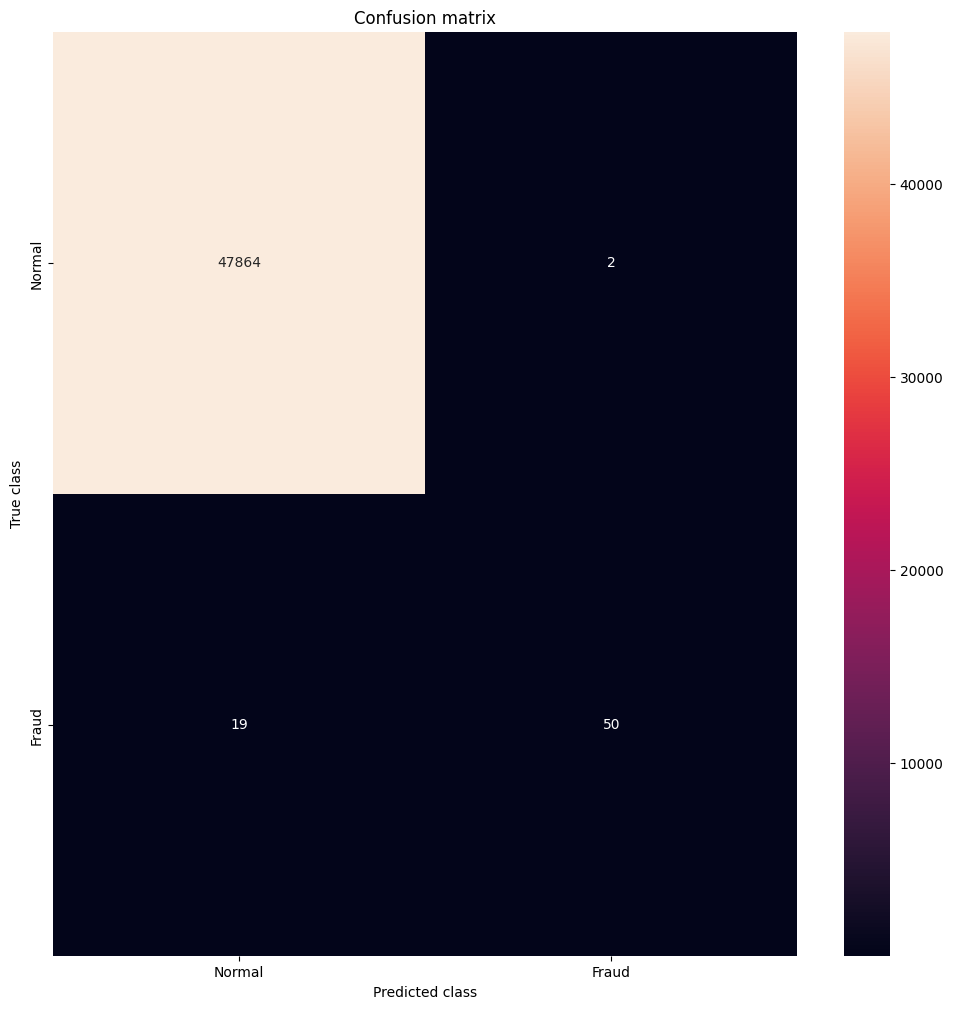

In [ ]:
# Printing the confusion matrix.
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

- Comparison with other algorithms without dealing with the imbalancing of the data.
- As you can see with our Random Forest Model we are getting a better result even for the recall which is the most tricky part.

# 13. Build models using Logistic Regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
xTrain

array([[ 1.46127000e+05, -1.55341594e+00, -2.92168323e+00, ...,
        -2.83483763e-01,  5.84795071e-02,  9.58920000e+02],
       [ 1.16303000e+05, -7.30066796e-01, -1.17409641e+00, ...,
         1.21398316e-01,  2.35096577e-01,  2.12000000e+02],
       [ 9.54150000e+04, -7.58870229e-01,  1.71273488e+00, ...,
         1.37405105e-01, -3.99092058e-01,  8.30000000e-01],
       ...,
       [ 7.97950000e+04, -1.46608925e-01,  9.92946123e-01, ...,
        -1.21139194e-01, -1.96195328e-01,  3.94000000e+00],
       [ 8.79310000e+04, -2.94863809e+00,  2.35484929e+00, ...,
         4.96912107e-01,  3.35821632e-01,  1.00000000e+00],
       [ 7.63810000e+04,  1.23317435e+00, -7.84850501e-01, ...,
         1.21657270e-03,  3.85878912e-02,  1.13000000e+02]])

In [ ]:
yTrain

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# Training the Logistic Regression Model with Training Data.
model.fit(xTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 13.1. Trước Downsampling.

In [ ]:
# Accuracy on training data.
X_train_prediction = model.predict(xTrain)
training_data_accuracy = accuracy_score(X_train_prediction, yTrain)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9989673354647252


In [ ]:
# Accuracy on test data.
X_test_prediction = model.predict(xTest)
test_data_accuracy = accuracy_score(X_test_prediction, yTest)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9989777824136852


### 13.2. Sau Downsampling.

In [ ]:
# Accuracy on training data.
X_train_prediction = model.predict(xTrain)
training_data_accuracy = accuracy_score(X_train_prediction, yTrain)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9428208386277002


In [ ]:
# Accuracy on test data.
X_test_prediction = model.predict(xTest)
test_data_accuracy = accuracy_score(X_test_prediction, yTest)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9289340101522843


=> Logistics model is simple but better.

# 14. Use Gradient for optimization.

In [ ]:
# Importing libraries necessary for Model Building and Training.
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train = xTrain.reshape((xTrain.shape[0], 1, xTrain.shape[1]))
X_test = xTest.reshape((xTest.shape[0], 1, xTest.shape[1]))

In [ ]:
model = Sequential([
    LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(16),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, yTrain, epochs=20, batch_size=32, validation_data=(X_test, yTest))

Epoch 1/20
5992/5992 [==============================] - 33s 5ms/step - loss: 0.0254 - accuracy: 0.9980 - val_loss: 0.0109 - val_accuracy: 0.9986
Epoch 2/20
5992/5992 [==============================] - 30s 5ms/step - loss: 0.0147 - accuracy: 0.9981 - val_loss: 0.0109 - val_accuracy: 0.9986
Epoch 3/20
5992/5992 [==============================] - 29s 5ms/step - loss: 0.0146 - accuracy: 0.9981 - val_loss: 0.0109 - val_accuracy: 0.9986
Epoch 4/20
5992/5992 [==============================] - 29s 5ms/step - loss: 0.0145 - accuracy: 0.9981 - val_loss: 0.0109 - val_accuracy: 0.9986
Epoch 5/20
5992/5992 [==============================] - 29s 5ms/step - loss: 0.0145 - accuracy: 0.9981 - val_loss: 0.0109 - val_accuracy: 0.9986
Epoch 6/20
5992/5992 [==============================] - 28s 5ms/step - loss: 0.0145 - accuracy: 0.9981 - val_loss: 0.0109 - val_accuracy: 0.9986
Epoch 7/20
5992/5992 [==============================] - 28s 5ms/step - loss: 0.0145 - accuracy: 0.9981 - val_loss: 0.0109 - val_ac

In [ ]:
# Evaluate the model.
loss, accuracy = model.evaluate(X_test, yTest)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Predict the results on the test set.
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix and classification report.
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))

1498/1498 [==============================] - 4s 2ms/step - loss: 0.0109 - accuracy: 0.9986
Test Accuracy: 99.86%
1498/1498 [==============================] - 4s 2ms/step
[[47866     0]
 [   69     0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     47866
         1.0       0.00      0.00      0.00        69

    accuracy                           1.00     47935
   macro avg       0.50      0.50      0.50     47935
weighted avg       1.00      1.00      1.00     47935



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


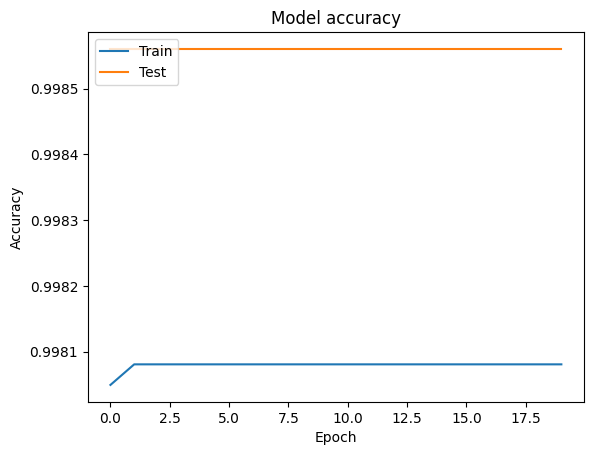

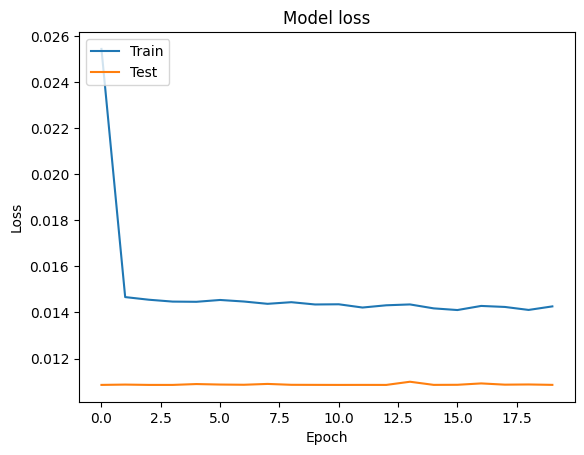

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
